In [23]:
countvert=set()
track = {}
value = ''
while value!='exit':
    
    i = int(input("Введите вершину от которой делаете ребро: "))
    j = int(input("Введите вершину к которой делаете ребро: "))
    
    countvert.add(i)
    countvert.add(j)
    
    weight = int(input("Введите вес ребра: "))
    
    track[(i,j)] = weight
    
    value = input("Нажмите Enter для продолжения или напишите exit для выхода")
    
print(countvert,track)

Введите вершину от которой делаете ребро: 1
Введите вершину к которой делаете ребро: 2
Введите вес ребра: 11
Нажмите Enter для продолжения или напишите exit для выхода
Введите вершину от которой делаете ребро: 2
Введите вершину к которой делаете ребро: 3
Введите вес ребра: 4
Нажмите Enter для продолжения или напишите exit для выхода3
Введите вершину от которой делаете ребро: 4
Введите вершину к которой делаете ребро: 5
Введите вес ребра: 12
Нажмите Enter для продолжения или напишите exit для выхода
Введите вершину от которой делаете ребро: 3
Введите вершину к которой делаете ребро: 4
Введите вес ребра: 6
Нажмите Enter для продолжения или напишите exit для выхода
Введите вершину от которой делаете ребро: 5
Введите вершину к которой делаете ребро: 1
Введите вес ребра: 7
Нажмите Enter для продолжения или напишите exit для выхода
Введите вершину от которой делаете ребро: 5
Введите вершину к которой делаете ребро: 3
Введите вес ребра: 2
Нажмите Enter для продолжения или напишите exit для вы

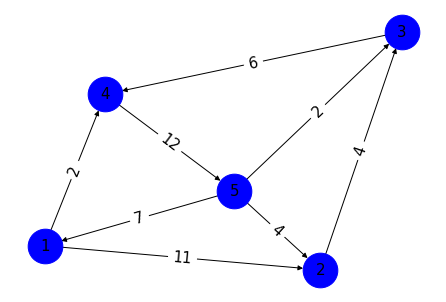

In [24]:
import networkx as nx
import matplotlib as plt
import pandas as pd
class Draw:
    def __init__(self):
        self.G=nx.DiGraph()

    def draw(self,node,track):
        
        [self.G.add_node(k) for k in node]
        [self.G.add_edge(k[0],k[1],weight=v) for k,v in track.items()]
        
        labels = nx.get_edge_attributes(self.G,'weight')
        options = {'font_size':15,
                   'node_color':'blue',
                   'label_pos':0.5,
                   'node_size':1200,
                   'style':'solid',
                   'width':1}
        pos = nx.spring_layout(self.G)
        nx.draw(self.G,
                pos,
                with_labels=True,
                **options)



        nx.draw_networkx_edge_labels(self.G,
                                     pos,
                                    edge_labels=labels,
                                    **options)
        
        
d = Draw()  
d.draw(range(1,len(countvert)),track)

In [25]:
track

{(1, 2): 11,
 (2, 3): 4,
 (4, 5): 12,
 (3, 4): 6,
 (5, 1): 7,
 (5, 3): 2,
 (1, 4): 2,
 (5, 2): 4}

In [30]:
A = list()
for i in range(1,len(countvert)+1):
    a = list()
    for j in range(1,len(countvert)+1):
        if i==j:
            a.append(0)
        elif (i,j) in track:
            a.append(track[i,j])
        else:
            a.append(99999)
    A.append(a)

In [31]:
data = pd.DataFrame(A,range(1,len(countvert)+1), range(1,len(countvert)+1) )
print("Матрица смежностей до реализации алгоритма Флойда (99999 означает, что вершины явно не соединены) ")
data

Матрица смежностей до реализации алгоритма Флойда (99999 означает, что вершины явно не соединены) 


,1,2,3,4,5
1,0,11,99999,2,99999
2,99999,0,4,99999,99999
3,99999,99999,0,6,99999
4,99999,99999,99999,0,12
5,7,4,2,99999,0


In [32]:
import pandas as pd
INF  = 99999

V = len(countvert)


def floydWarshall(graph): 
  
    dist = list(map(lambda i : list(map(lambda j : j , i)) , graph))

    for k in range(V): 
        for i in range(V): 
            for j in range(V): 
                dist[i][j] = min(dist[i][j], dist[i][k]+ dist[k][j] )
                
    sost_mat(dist) 
  
  
Matriza_sm = list()
def sost_mat(dist): 
    for i in range(V): 
        a = list()
        for j in range(V): 
            if(dist[i][j] == INF): 
                a.append(INF)  
            else: 
                a.append(dist[i][j])   
            if j == V-1: 
                Matriza_sm.append(a)

floydWarshall(A)

print("Матрица смежностей после реализации алгоритма Флойда")
data_m = pd.DataFrame(Matriza_sm,range(1,len(countvert)+1), range(1,len(countvert)+1) )
data_m

Матрица смежностей после реализации алгоритма Флойда


,1,2,3,4,5
1,0,11,15,2,14
2,29,0,4,10,22
3,25,22,0,6,18
4,19,16,14,0,12
5,7,4,2,8,0


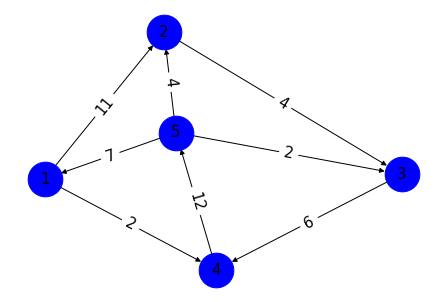

In [33]:
d = Draw()  
d.draw(range(1,len(countvert)),track)

In [14]:
import pandas as pd
INF  = 99999